# Stage 09: Enhanced Feature Engineering for Turtle Trading Strategy

**Project:** Turtle Trading Strategy Implementation  
**Author:** Panwei Hu  
**Date:** 2025-08-23
**Stage:** 09 - Feature Engineering

## Objectives
- Apply advanced feature engineering techniques to preprocessed financial time series data
- Create enhanced features that complement existing technical indicators
- Build upon the rich dataset already containing Donchian channels, ATR, moving averages, and trading signals
- Generate additional cross-asset, regime, and risk management features
- Visualize feature engineering effects on trading performance
- Prepare comprehensive dataset for strategy backtesting and optimization

## Enhanced Feature Engineering Categories
Working with preprocessed data containing: `date`, `adj_close`, `symbol`, `asset_category`, `returns`, `return_zscore`, `is_anomaly`, `sma_20`, `sma_50`, `donchian_high_20`, `donchian_low_20`, `donchian_mid_20`, `donchian_high_55`, `donchian_low_55`, `atr_20`, `price_position`, `long_entry_20`, `short_entry_20`, `long_exit_10`, `short_exit_10`, `volatility_20`, `trend_strength`

**Enhancement Areas:**
1. **Enhanced Price Features**: Additional momentum and acceleration measures
2. **Signal Enhancement**: Signal persistence, strength, and combinations
3. **Volatility Features**: Regime changes, percentiles, and comparisons
4. **Cross-Asset Features**: Market-relative performance and correlations
5. **Regime Detection**: Combined trend, volatility, and breakout regimes
6. **Interaction Features**: Multi-dimensional feature combinations
7. **Time Features**: Seasonality and calendar effects
8. **Risk Features**: Advanced drawdown and Sharpe measures
9. **Dimensionality Reduction**: PCA on technical indicators


In [1]:
# Setup and Configuration
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
import glob
warnings.filterwarnings('ignore')

# Add project src to path
sys.path.append('../src')
project_root = Path('.').absolute().parent

# Configure plotting
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

# Import project modules
try:
    from feature_engineering import TurtleFeatureEngineer, create_turtle_features
    print("✅ Successfully imported enhanced feature engineering module")
except ImportError as e:
    print(f"⚠️ Could not import feature engineering module: {e}")
    print("Please ensure the module is in the src/ directory")

print("🔧 Enhanced Turtle Feature Engineering Setup Complete")


✅ Successfully imported enhanced feature engineering module
🔧 Enhanced Turtle Feature Engineering Setup Complete


In [2]:
# Load Preprocessed Turtle Trading Data
print("📊 Loading Turtle Trading Dataset...")

# Load the preprocessed data that user mentioned
preprocessed_file = "../data/processed/turtle_preprocessed_20250820_115449.parquet"

try:
    df = pd.read_parquet(preprocessed_file)
    print(f"✅ Loaded data from: {preprocessed_file}")
    data_loaded = True
except FileNotFoundError:
    print(f"⚠️ Specific file not found, searching for any preprocessed turtle data...")
    
    # Try to find any preprocessed turtle file
    data_sources = [
        "../data/processed/turtle_preprocessed_*.parquet",
        "../data/processed/turtle_real_data.parquet",
        "../data/processed/turtle_real_data.csv"
    ]
    
    data_loaded = False
    for source in data_sources:
        try:
            if '*' in source:
                files = glob.glob(source)
                if files:
                    source = max(files)  # Get the most recent file
            
            if Path(source).exists():
                if source.endswith('.parquet'):
                    df = pd.read_parquet(source)
                else:
                    df = pd.read_csv(source)
                
                print(f"✅ Loaded data from: {source}")
                data_loaded = True
                break
        except Exception as e:
            continue
    
    if not data_loaded:
        print("❌ No preprocessed turtle data found.")
        raise FileNotFoundError("Please run data acquisition and preprocessing notebooks first")

# Data Overview
print(f"\n📊 Dataset Overview:")
print(f"   Shape: {df.shape}")
print(f"   Date range: {df['date'].min()} to {df['date'].max()}")
print(f"   Assets: {df['symbol'].nunique()}")
print(f"   Columns: {list(df.columns)}")

# Display existing features
existing_features = [col for col in df.columns if col not in ['date', 'adj_close', 'symbol', 'asset_category']]
print(f"\n🔧 Existing Features ({len(existing_features)}):")
for i, feature in enumerate(existing_features, 1):
    print(f"  {i:2d}. {feature}")

# Ensure proper data types and sorting
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(['symbol', 'date']).reset_index(drop=True)

print(f"\n📈 Sample Data:")
display(df.head())


📊 Loading Turtle Trading Dataset...
✅ Loaded data from: ../data/processed/turtle_preprocessed_20250820_115449.parquet

📊 Dataset Overview:
   Shape: (9036, 22)
   Date range: 2023-08-21 00:00:00 to 2025-08-20 00:00:00
   Assets: 18
   Columns: ['date', 'adj_close', 'symbol', 'asset_category', 'returns', 'return_zscore', 'is_anomaly', 'sma_20', 'sma_50', 'donchian_high_20', 'donchian_low_20', 'donchian_mid_20', 'donchian_high_55', 'donchian_low_55', 'atr_20', 'price_position', 'long_entry_20', 'short_entry_20', 'long_exit_10', 'short_exit_10', 'volatility_20', 'trend_strength']

🔧 Existing Features (18):
   1. returns
   2. return_zscore
   3. is_anomaly
   4. sma_20
   5. sma_50
   6. donchian_high_20
   7. donchian_low_20
   8. donchian_mid_20
   9. donchian_high_55
  10. donchian_low_55
  11. atr_20
  12. price_position
  13. long_entry_20
  14. short_entry_20
  15. long_exit_10
  16. short_exit_10
  17. volatility_20
  18. trend_strength

📈 Sample Data:


,date,adj_close,symbol,asset_category,returns,return_zscore,is_anomaly,sma_20,sma_50,donchian_high_20,...,donchian_high_55,donchian_low_55,atr_20,price_position,long_entry_20,short_entry_20,long_exit_10,short_exit_10,volatility_20,trend_strength
0,2023-08-21,19.559673,DBA,commodities,NaN,NaN,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,False,False,False,False,NaN,NaN
1,2023-08-22,19.440237,DBA,commodities,-0.006106,0.706503,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,False,False,False,False,NaN,NaN
2,2023-08-23,19.642357,DBA,commodities,0.010397,1.006658,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,False,False,False,False,NaN,NaN
3,2023-08-24,19.807728,DBA,commodities,0.008419,0.801338,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,False,False,False,False,NaN,NaN
4,2023-08-25,19.862852,DBA,commodities,0.002783,0.216265,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,False,False,False,False,NaN,NaN


In [3]:
# Apply Enhanced Feature Engineering
print("🔧 Applying Enhanced Turtle Trading Feature Engineering...")
print("=" * 60)

# Initialize the enhanced feature engineer
engineer = TurtleFeatureEngineer()

# Apply comprehensive feature engineering
df_enhanced = engineer.engineer_all_features(
    df, 
    asset_col='symbol',
    price_col='adj_close'
)

print("\n" + "=" * 60)
print("✅ Enhanced Feature Engineering Complete!")

# Display results
original_features = len(df.columns)
enhanced_features = len(df_enhanced.columns)
new_features = enhanced_features - original_features

print(f"\n📊 Feature Engineering Results:")
print(f"   Original features: {original_features}")
print(f"   Enhanced features: {enhanced_features}")
print(f"   New features added: {new_features}")
print(f"   Expansion ratio: {new_features/original_features:.1f}x")

# Show new features
new_feature_names = [col for col in df_enhanced.columns if col not in df.columns]
print(f"\n🆕 New Features Added ({len(new_feature_names)}):")
for i, feature in enumerate(new_feature_names, 1):
    print(f"  {i:2d}. {feature}")

# Display sample of enhanced data
print(f"\n📈 Enhanced Dataset Sample:")
display(df_enhanced.head())


🔧 Applying Enhanced Turtle Trading Feature Engineering...
🔧 Starting Enhanced Turtle Trading Feature Engineering...
   Input dataset: (9036, 22)
   Existing columns: ['date', 'adj_close', 'symbol', 'asset_category', 'returns', 'return_zscore', 'is_anomaly', 'sma_20', 'sma_50', 'donchian_high_20', 'donchian_low_20', 'donchian_mid_20', 'donchian_high_55', 'donchian_low_55', 'atr_20', 'price_position', 'long_entry_20', 'short_entry_20', 'long_exit_10', 'short_exit_10', 'volatility_20', 'trend_strength']
1️⃣ Creating enhanced price features...


2️⃣ Creating enhanced signal features...
3️⃣ Creating volatility features...
4️⃣ Creating cross-asset features...
5️⃣ Creating regime features...
6️⃣ Creating interaction features...
7️⃣ Creating time features...
8️⃣ Creating risk features...
9️⃣ Creating PCA features...
✅ Enhanced feature engineering complete!
   Features: 22 → 85 (+63)
   Expansion ratio: 2.9x

✅ Enhanced Feature Engineering Complete!

📊 Feature Engineering Results:
   Original features: 22
   Enhanced features: 85
   New features added: 63
   Expansion ratio: 2.9x

🆕 New Features Added (63):
   1. price_momentum_5d
   2. price_momentum_15d
   3. price_momentum_30d
   4. returns_acceleration
   5. price_above_sma20
   6. price_above_sma50
   7. donchian_position_20
   8. donchian_position_55
   9. any_entry_signal
  10. conflicting_signals
  11. signal_strength_atr
  12. long_entry_20_streak
  13. long_entry_20_days_since
  14. short_entry_20_streak
  15. short_entry_20_days_since
  16. long_exit_10_streak
  17. long

,date,adj_close,symbol,asset_category,returns,return_zscore,is_anomaly,sma_20,sma_50,donchian_high_20,...,sharpe_approx_20d,sharpe_approx_60d,sharpe_approx_252d,running_max,drawdown,max_dd_60d,max_dd_252d,technical_pca_1,technical_pca_2,technical_pca_3
0,2023-08-21,19.559673,DBA,commodities,NaN,NaN,False,NaN,NaN,NaN,...,NaN,NaN,NaN,19.559673,0.000000,NaN,NaN,-0.000083,0.000409,0.000524
1,2023-08-22,19.440237,DBA,commodities,-0.006106,0.706503,False,NaN,NaN,NaN,...,NaN,NaN,NaN,19.559673,-0.006106,NaN,NaN,-0.000083,0.000409,0.000524
2,2023-08-23,19.642357,DBA,commodities,0.010397,1.006658,False,NaN,NaN,NaN,...,NaN,NaN,NaN,19.642357,0.000000,NaN,NaN,-0.000083,0.000409,0.000524
3,2023-08-24,19.807728,DBA,commodities,0.008419,0.801338,False,NaN,NaN,NaN,...,NaN,NaN,NaN,19.807728,0.000000,NaN,NaN,-0.000083,0.000409,0.000524
4,2023-08-25,19.862852,DBA,commodities,0.002783,0.216265,False,NaN,NaN,NaN,...,NaN,NaN,NaN,19.862852,0.000000,NaN,NaN,-0.000083,0.000409,0.000524


📊 Analyzing Enhanced Features...

🔍 Feature Categories Breakdown:
   Enhanced Price: 7 features
   Enhanced Signals: 12 features
   Volatility: 8 features
   Cross Asset: 8 features
   Regime: 4 features
   Interaction: 3 features
   Time: 9 features
   Risk: 6 features
   Pca: 3 features

🎯 Top 10 Features by Correlation with Returns:
   39. excess_return             (r=+0.908)
   46. return_vs_category        (r=+0.751)
   17. returns_acceleration      (r=+0.722)
   45. category_avg_return       (r=+0.661)
   14. price_momentum_5d         (r=+0.445)
   37. market_return             (r=+0.420)
   55. entry_signal_vol_interaction (r=+0.373)
   20. donchian_position_20      (r=+0.310)
   11. price_position            (r=+0.310)
   51. breakout_regime           (r=+0.303)


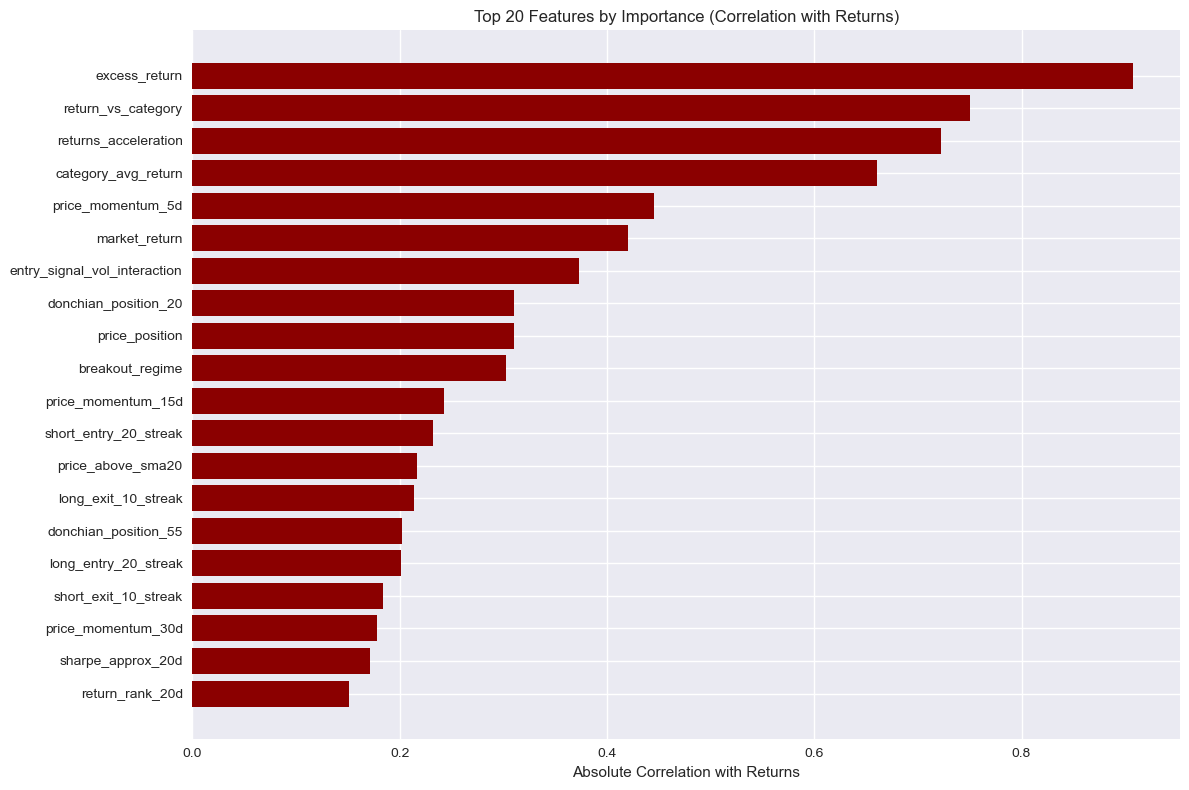


📈 Sample of Key Enhanced Features:


,date,symbol,adj_close,price_momentum_5d,price_momentum_15d,returns_acceleration,any_entry_signal,signal_strength_atr,vol_regime_change,market_return,excess_return,ma_trend_regime,drawdown
0,2023-08-21,DBA,19.559673,NaN,NaN,NaN,0,NaN,0,NaN,NaN,0,0.000000
1,2023-08-22,DBA,19.440237,NaN,NaN,NaN,0,NaN,0,-0.001756,-0.004350,0,-0.006106
2,2023-08-23,DBA,19.642357,NaN,NaN,0.016503,0,NaN,0,0.008906,0.001491,0,0.000000
3,2023-08-24,DBA,19.807728,NaN,NaN,-0.001978,0,NaN,0,-0.004557,0.012976,0,0.000000
4,2023-08-25,DBA,19.862852,NaN,NaN,-0.005636,0,NaN,0,0.004312,-0.001529,0,0.000000
5,2023-08-28,DBA,20.055782,0.025364,NaN,0.006930,0,NaN,0,0.004039,0.005674,0,0.000000
6,2023-08-29,DBA,20.028221,0.030246,NaN,-0.011087,0,NaN,0,0.009451,-0.010825,0,-0.001374
7,2023-08-30,DBA,20.074160,0.021983,NaN,0.003668,0,NaN,0,0.003232,-0.000938,0,0.000000
8,2023-08-31,DBA,19.973099,0.008349,NaN,-0.007328,0,NaN,0,-0.000933,-0.004102,0,-0.005034
9,2023-09-01,DBA,20.009848,0.007401,NaN,0.006874,0,NaN,0,0.000146,0.001694,0,-0.003204



📈 Sample of Key Enhanced Features:


,date,symbol,adj_close,price_momentum_5d,price_momentum_15d,returns_acceleration,any_entry_signal,signal_strength_atr,vol_regime_change,market_return,excess_return,ma_trend_regime,drawdown
9026,2025-08-07,VEA,57.750000,0.027214,0.017263,-0.000583,0,2.789911,0,0.002399,0.004751,1,-0.012821
9027,2025-08-08,VEA,58.020000,0.035702,0.024364,-0.002475,0,2.779003,0,-0.000442,0.005117,1,-0.008205
9028,2025-08-11,VEA,57.790001,0.017430,0.013682,-0.008639,0,2.814176,0,-0.002090,-0.001874,1,-0.012137
9029,2025-08-12,VEA,58.439999,0.027065,0.020251,0.015212,0,2.873748,0,0.001749,0.009499,1,-0.001026
9030,2025-08-13,VEA,58.709999,0.023893,0.003590,-0.006627,1,2.874769,0,0.005239,-0.000619,1,0.000000
9031,2025-08-14,VEA,58.610001,0.014892,0.008952,-0.006323,0,2.851724,0,-0.002912,0.001209,1,-0.001703
9032,2025-08-15,VEA,58.869999,0.014650,0.014650,0.006139,1,2.910045,0,0.001451,0.002985,1,0.000000
9033,2025-08-18,VEA,58.810001,0.017650,0.028866,-0.005455,0,2.810307,0,-0.000521,-0.000498,1,-0.001019
9034,2025-08-19,VEA,58.740002,0.005134,0.028001,-0.000171,0,2.739736,0,-0.005587,0.004397,1,-0.002208
9035,2025-08-20,VEA,58.805000,0.001618,0.036942,0.002297,0,2.781021,0,-0.000589,0.001696,1,-0.001104



✅ Feature Engineering Analysis Complete!


In [8]:
# Feature Engineering Analysis and Visualization
print("📊 Analyzing Enhanced Features...")

# Get feature metadata
metadata = engineer.feature_metadata
print(f"\n🔍 Feature Categories Breakdown:")
for category, count in metadata['feature_categories'].items():
    if count > 0:
        print(f"   {category.replace('_', ' ').title()}: {count} features")

# Analyze feature importance (using returns as target)
if 'returns' in df_enhanced.columns:
    importance_df = engineer.get_feature_importance(df_enhanced, 'returns')
    
    if not importance_df.empty:
        print(f"\n🎯 Top 10 Features by Correlation with Returns:")
        top_features = importance_df.head(10)
        for i, row in top_features.iterrows():
            print(f"   {i+1:2d}. {row['feature']:<25} (r={row['correlation']:+.3f})")
        
        # Visualize feature importance
        plt.figure(figsize=(12, 8))
        
        # Top 20 features
        top_20 = importance_df.head(20)
        colors = ['darkred' if abs(corr) > 0.1 else 'steelblue' for corr in top_20['correlation']]
        
        plt.barh(range(len(top_20)), top_20['abs_correlation'], color=colors)
        plt.yticks(range(len(top_20)), top_20['feature'])
        plt.xlabel('Absolute Correlation with Returns')
        plt.title('Top 20 Features by Importance (Correlation with Returns)')
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()

# Sample key enhanced features
key_features = ['price_momentum_5d', 'price_momentum_15d', 'returns_acceleration', 
               'any_entry_signal', 'signal_strength_atr', 'vol_regime_change',
               'market_return', 'excess_return', 'ma_trend_regime', 'drawdown']

available_key_features = [f for f in key_features if f in df_enhanced.columns]
if available_key_features:
    print(f"\n📈 Sample of Key Enhanced Features:")
    display(df_enhanced[['date', 'symbol', 'adj_close'] + available_key_features].head(10))
if available_key_features:
    print(f"\n📈 Sample of Key Enhanced Features:")
    display(df_enhanced[['date', 'symbol', 'adj_close'] + available_key_features].tail(10))

print(f"\n✅ Feature Engineering Analysis Complete!")


📊 Creating Enhanced Feature Visualizations...


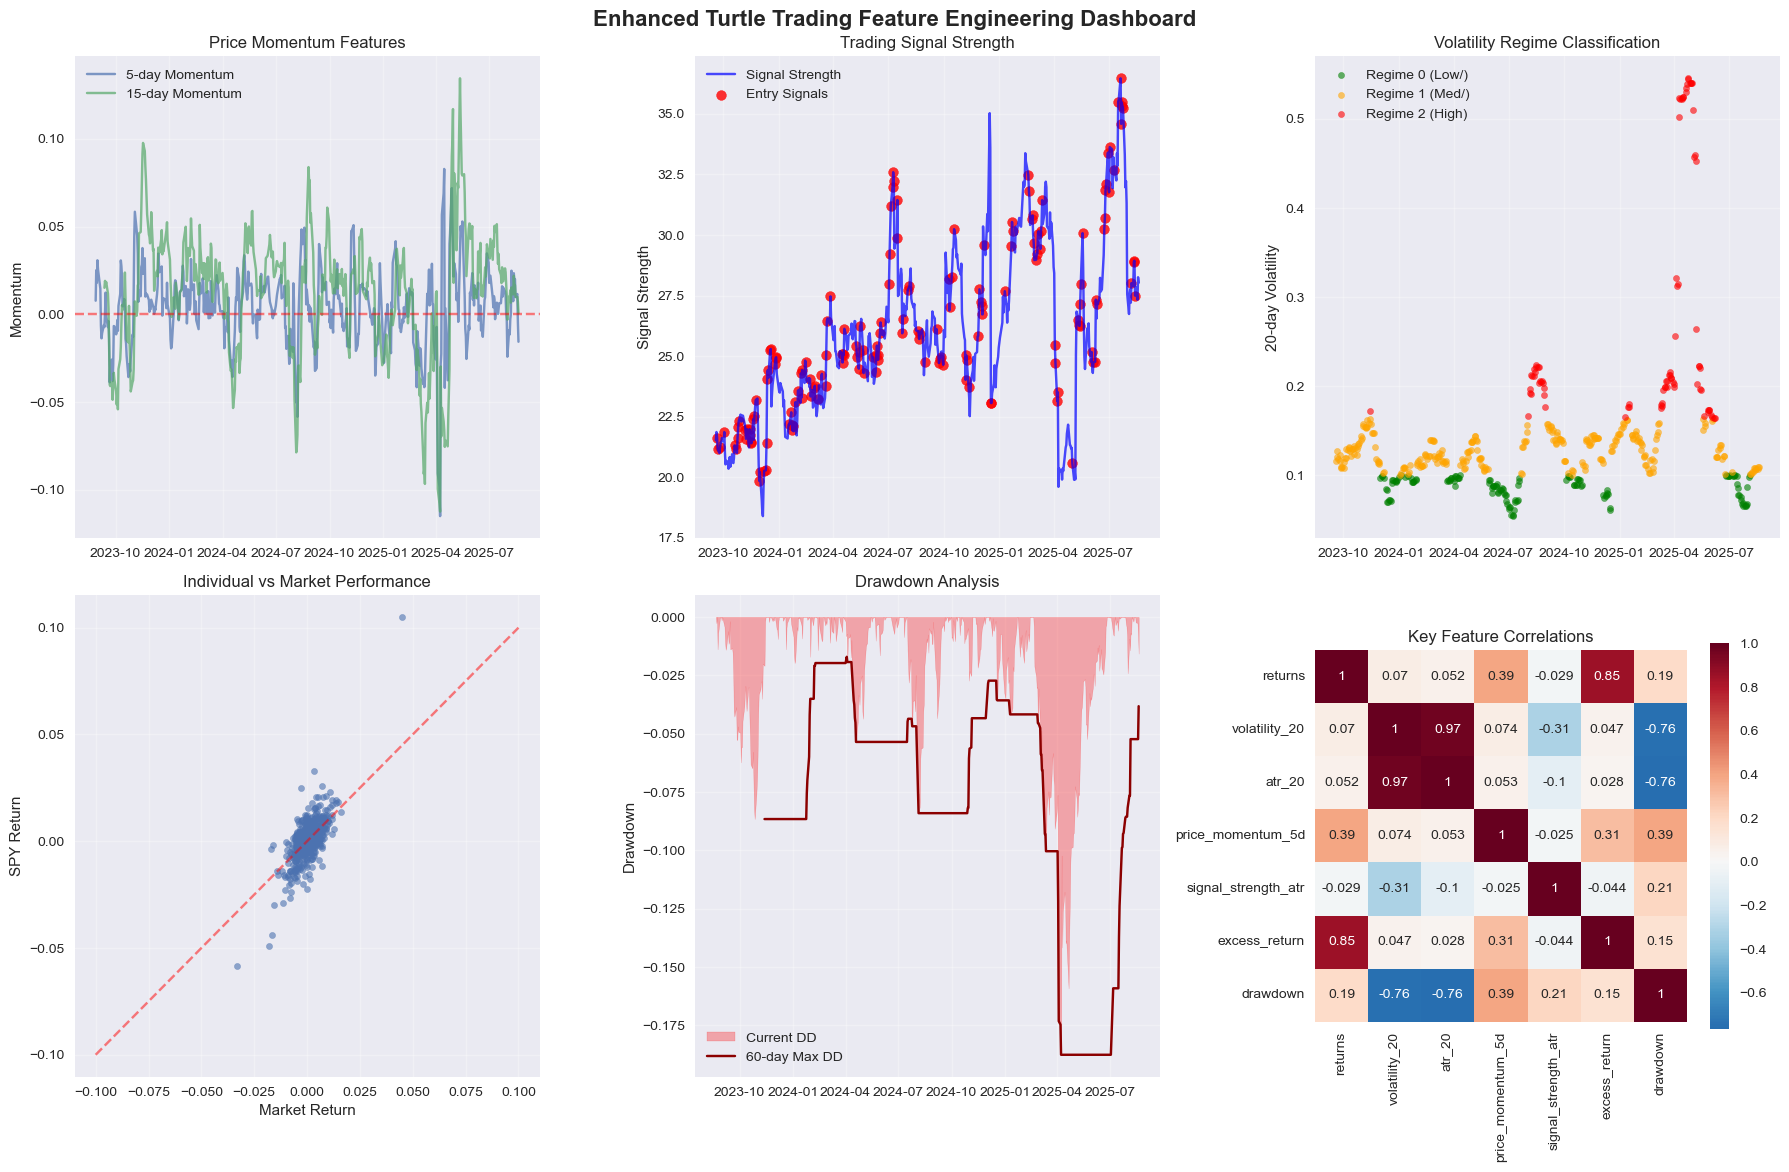

✅ Enhanced feature visualizations complete!


In [6]:
# Enhanced Feature Visualizations
print("📊 Creating Enhanced Feature Visualizations...")

# Create a comprehensive visualization dashboard
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Enhanced Turtle Trading Feature Engineering Dashboard', fontsize=16, fontweight='bold')

# Focus on SPY for detailed analysis
spy_data = df_enhanced[df_enhanced['symbol'] == 'SPY'].copy()

# 1. Price Momentum Evolution
if 'price_momentum_5d' in spy_data.columns and 'price_momentum_15d' in spy_data.columns:
    ax = axes[0, 0]
    ax.plot(spy_data['date'], spy_data['price_momentum_5d'], label='5-day Momentum', alpha=0.7)
    ax.plot(spy_data['date'], spy_data['price_momentum_15d'], label='15-day Momentum', alpha=0.7)
    ax.axhline(y=0, color='red', linestyle='--', alpha=0.5)
    ax.set_title('Price Momentum Features')
    ax.set_ylabel('Momentum')
    ax.legend()
    ax.grid(True, alpha=0.3)

# 2. Signal Strength and Entry Signals
if 'signal_strength_atr' in spy_data.columns and 'any_entry_signal' in spy_data.columns:
    ax = axes[0, 1]
    ax.plot(spy_data['date'], spy_data['signal_strength_atr'], color='blue', alpha=0.7, label='Signal Strength')
    # Highlight entry signals
    signal_dates = spy_data[spy_data['any_entry_signal'] == 1]['date']
    signal_strengths = spy_data[spy_data['any_entry_signal'] == 1]['signal_strength_atr']
    ax.scatter(signal_dates, signal_strengths, color='red', s=50, alpha=0.8, label='Entry Signals')
    ax.set_title('Trading Signal Strength')
    ax.set_ylabel('Signal Strength')
    ax.legend()
    ax.grid(True, alpha=0.3)

# 3. Volatility Regime Analysis
if 'vol_regime' in spy_data.columns and 'volatility_20' in spy_data.columns:
    ax = axes[0, 2]
    colors = ['green', 'orange', 'red']
    for regime in [0, 1, 2]:
        regime_data = spy_data[spy_data['vol_regime'] == regime]
        if len(regime_data) > 0:
            ax.scatter(regime_data['date'], regime_data['volatility_20'], 
                      color=colors[regime], alpha=0.6, s=20,
                      label=f'Regime {regime} ({"Low/Med/High"[regime*4:(regime+1)*4]})')
    ax.set_title('Volatility Regime Classification')
    ax.set_ylabel('20-day Volatility')
    ax.legend()
    ax.grid(True, alpha=0.3)

# 4. Market vs Individual Performance
if 'market_return' in spy_data.columns and 'returns' in spy_data.columns:
    ax = axes[1, 0]
    ax.scatter(spy_data['market_return'], spy_data['returns'], alpha=0.6, s=20)
    ax.plot([-0.1, 0.1], [-0.1, 0.1], 'r--', alpha=0.5)  # 45-degree line
    ax.set_xlabel('Market Return')
    ax.set_ylabel('SPY Return')
    ax.set_title('Individual vs Market Performance')
    ax.grid(True, alpha=0.3)

# 5. Drawdown Analysis
if 'drawdown' in spy_data.columns and 'max_dd_60d' in spy_data.columns:
    ax = axes[1, 1]
    ax.fill_between(spy_data['date'], spy_data['drawdown'], 0, alpha=0.3, color='red', label='Current DD')
    ax.plot(spy_data['date'], spy_data['max_dd_60d'], color='darkred', label='60-day Max DD')
    ax.set_title('Drawdown Analysis')
    ax.set_ylabel('Drawdown')
    ax.legend()
    ax.grid(True, alpha=0.3)

# 6. Feature Correlation Heatmap (subset of key features)
key_numeric_features = []
for feature in ['returns', 'volatility_20', 'atr_20', 'price_momentum_5d', 
               'signal_strength_atr', 'excess_return', 'drawdown']:
    if feature in spy_data.columns:
        key_numeric_features.append(feature)

if len(key_numeric_features) >= 3:
    ax = axes[1, 2]
    corr_matrix = spy_data[key_numeric_features].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', center=0, 
                square=True, ax=ax, cbar_kws={'shrink': 0.8})
    ax.set_title('Key Feature Correlations')

plt.tight_layout()
plt.show()

print("✅ Enhanced feature visualizations complete!")


In [7]:
# Save Enhanced Dataset
print("💾 Saving Enhanced Feature Dataset...")

# Create timestamp for filename
from datetime import datetime
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')

# Save to processed directory
output_file = f"../data/processed/turtle_enhanced_features_{timestamp}.parquet"

# Ensure directory exists
Path("../data/processed").mkdir(parents=True, exist_ok=True)

# Save enhanced dataset
df_enhanced.to_parquet(output_file, index=False)
print(f"✅ Enhanced dataset saved to: {output_file}")

# Also save feature metadata
metadata_file = f"../data/processed/feature_metadata_{timestamp}.json"
import json
with open(metadata_file, 'w') as f:
    json.dump(engineer.feature_metadata, f, indent=2)
print(f"✅ Feature metadata saved to: {metadata_file}")

# Summary
print(f"\n📊 Final Dataset Summary:")
print(f"   Shape: {df_enhanced.shape}")
print(f"   Features: {len(df_enhanced.columns)}")
print(f"   Date range: {df_enhanced['date'].min()} to {df_enhanced['date'].max()}")
print(f"   Assets: {df_enhanced['symbol'].nunique()}")
print(f"   Memory usage: {df_enhanced.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

print(f"\n🎯 Enhanced Turtle Trading Dataset Ready for Strategy Implementation!")
print(f"   ✅ Rich technical indicators from preprocessing")
print(f"   ✅ Enhanced price momentum and acceleration features")
print(f"   ✅ Advanced signal persistence and strength measures")
print(f"   ✅ Cross-asset market-relative features")
print(f"   ✅ Multi-regime classification system")
print(f"   ✅ Risk management and portfolio features")
print(f"   ✅ Time-based and interaction features")
print(f"   ✅ PCA dimensionality reduction")

print(f"\n🔧 Ready for Stage 10: Strategy Implementation and Backtesting!")


💾 Saving Enhanced Feature Dataset...
✅ Enhanced dataset saved to: ../data/processed/turtle_enhanced_features_20250825_140536.parquet
✅ Feature metadata saved to: ../data/processed/feature_metadata_20250825_140536.json

📊 Final Dataset Summary:
   Shape: (9036, 85)
   Features: 85
   Date range: 2023-08-21 00:00:00 to 2025-08-20 00:00:00
   Assets: 18
   Memory usage: 6.4 MB

🎯 Enhanced Turtle Trading Dataset Ready for Strategy Implementation!
   ✅ Rich technical indicators from preprocessing
   ✅ Enhanced price momentum and acceleration features
   ✅ Advanced signal persistence and strength measures
   ✅ Cross-asset market-relative features
   ✅ Multi-regime classification system
   ✅ Risk management and portfolio features
   ✅ Time-based and interaction features
   ✅ PCA dimensionality reduction

🔧 Ready for Stage 10: Strategy Implementation and Backtesting!
